In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
# Load the dataset
titanic_data = pd.read_csv('titanic.csv')

In [49]:
# 1. Data Analysis & Preprocessing:
# Identify attribute types
# - Ordinal: Pclass
# - Nominal: Sex, Embarked
# - Binary: Survived
# - Discrete: SibSp, Parch
# - Continuous: Age, Fare

In [50]:
# Justify preprocessing steps:
# - Ordinal: No preprocessing needed
# - Nominal: Convert to numerical using one-hot encoding
# - Binary: No preprocessing needed
# - Discrete: No preprocessing needed
# - Continuous: Handle missing values (imputation), scale if necessary


In [51]:
# Preprocessing
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [52]:
# Duplicate the dataset
titanic_data_unprocessed = titanic_data.copy()

In [53]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [54]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [55]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [56]:
# Duplicate the dataset
titanic_data_unprocessed = titanic_data.copy()

In [57]:
# 2. Data Visualization:
# Basic count plots
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

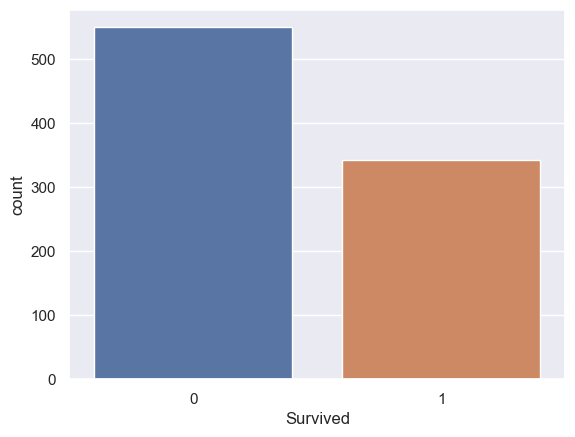

In [58]:
sns.countplot(x='Survived', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

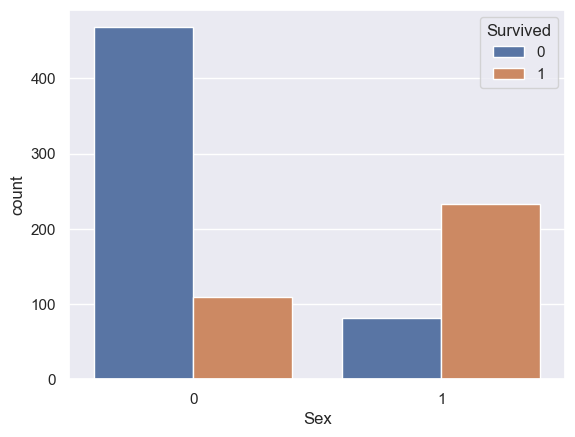

In [59]:
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

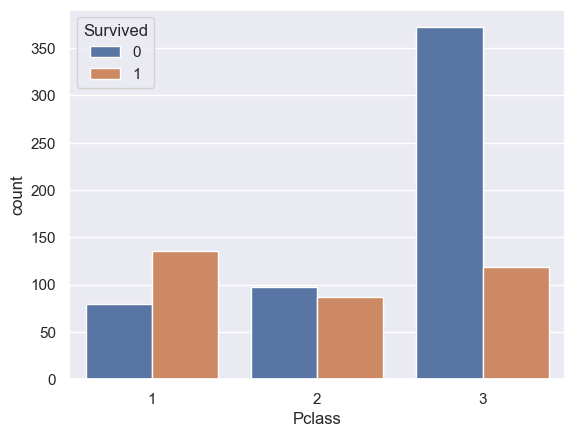

In [60]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

<Figure size 1000x600 with 0 Axes>

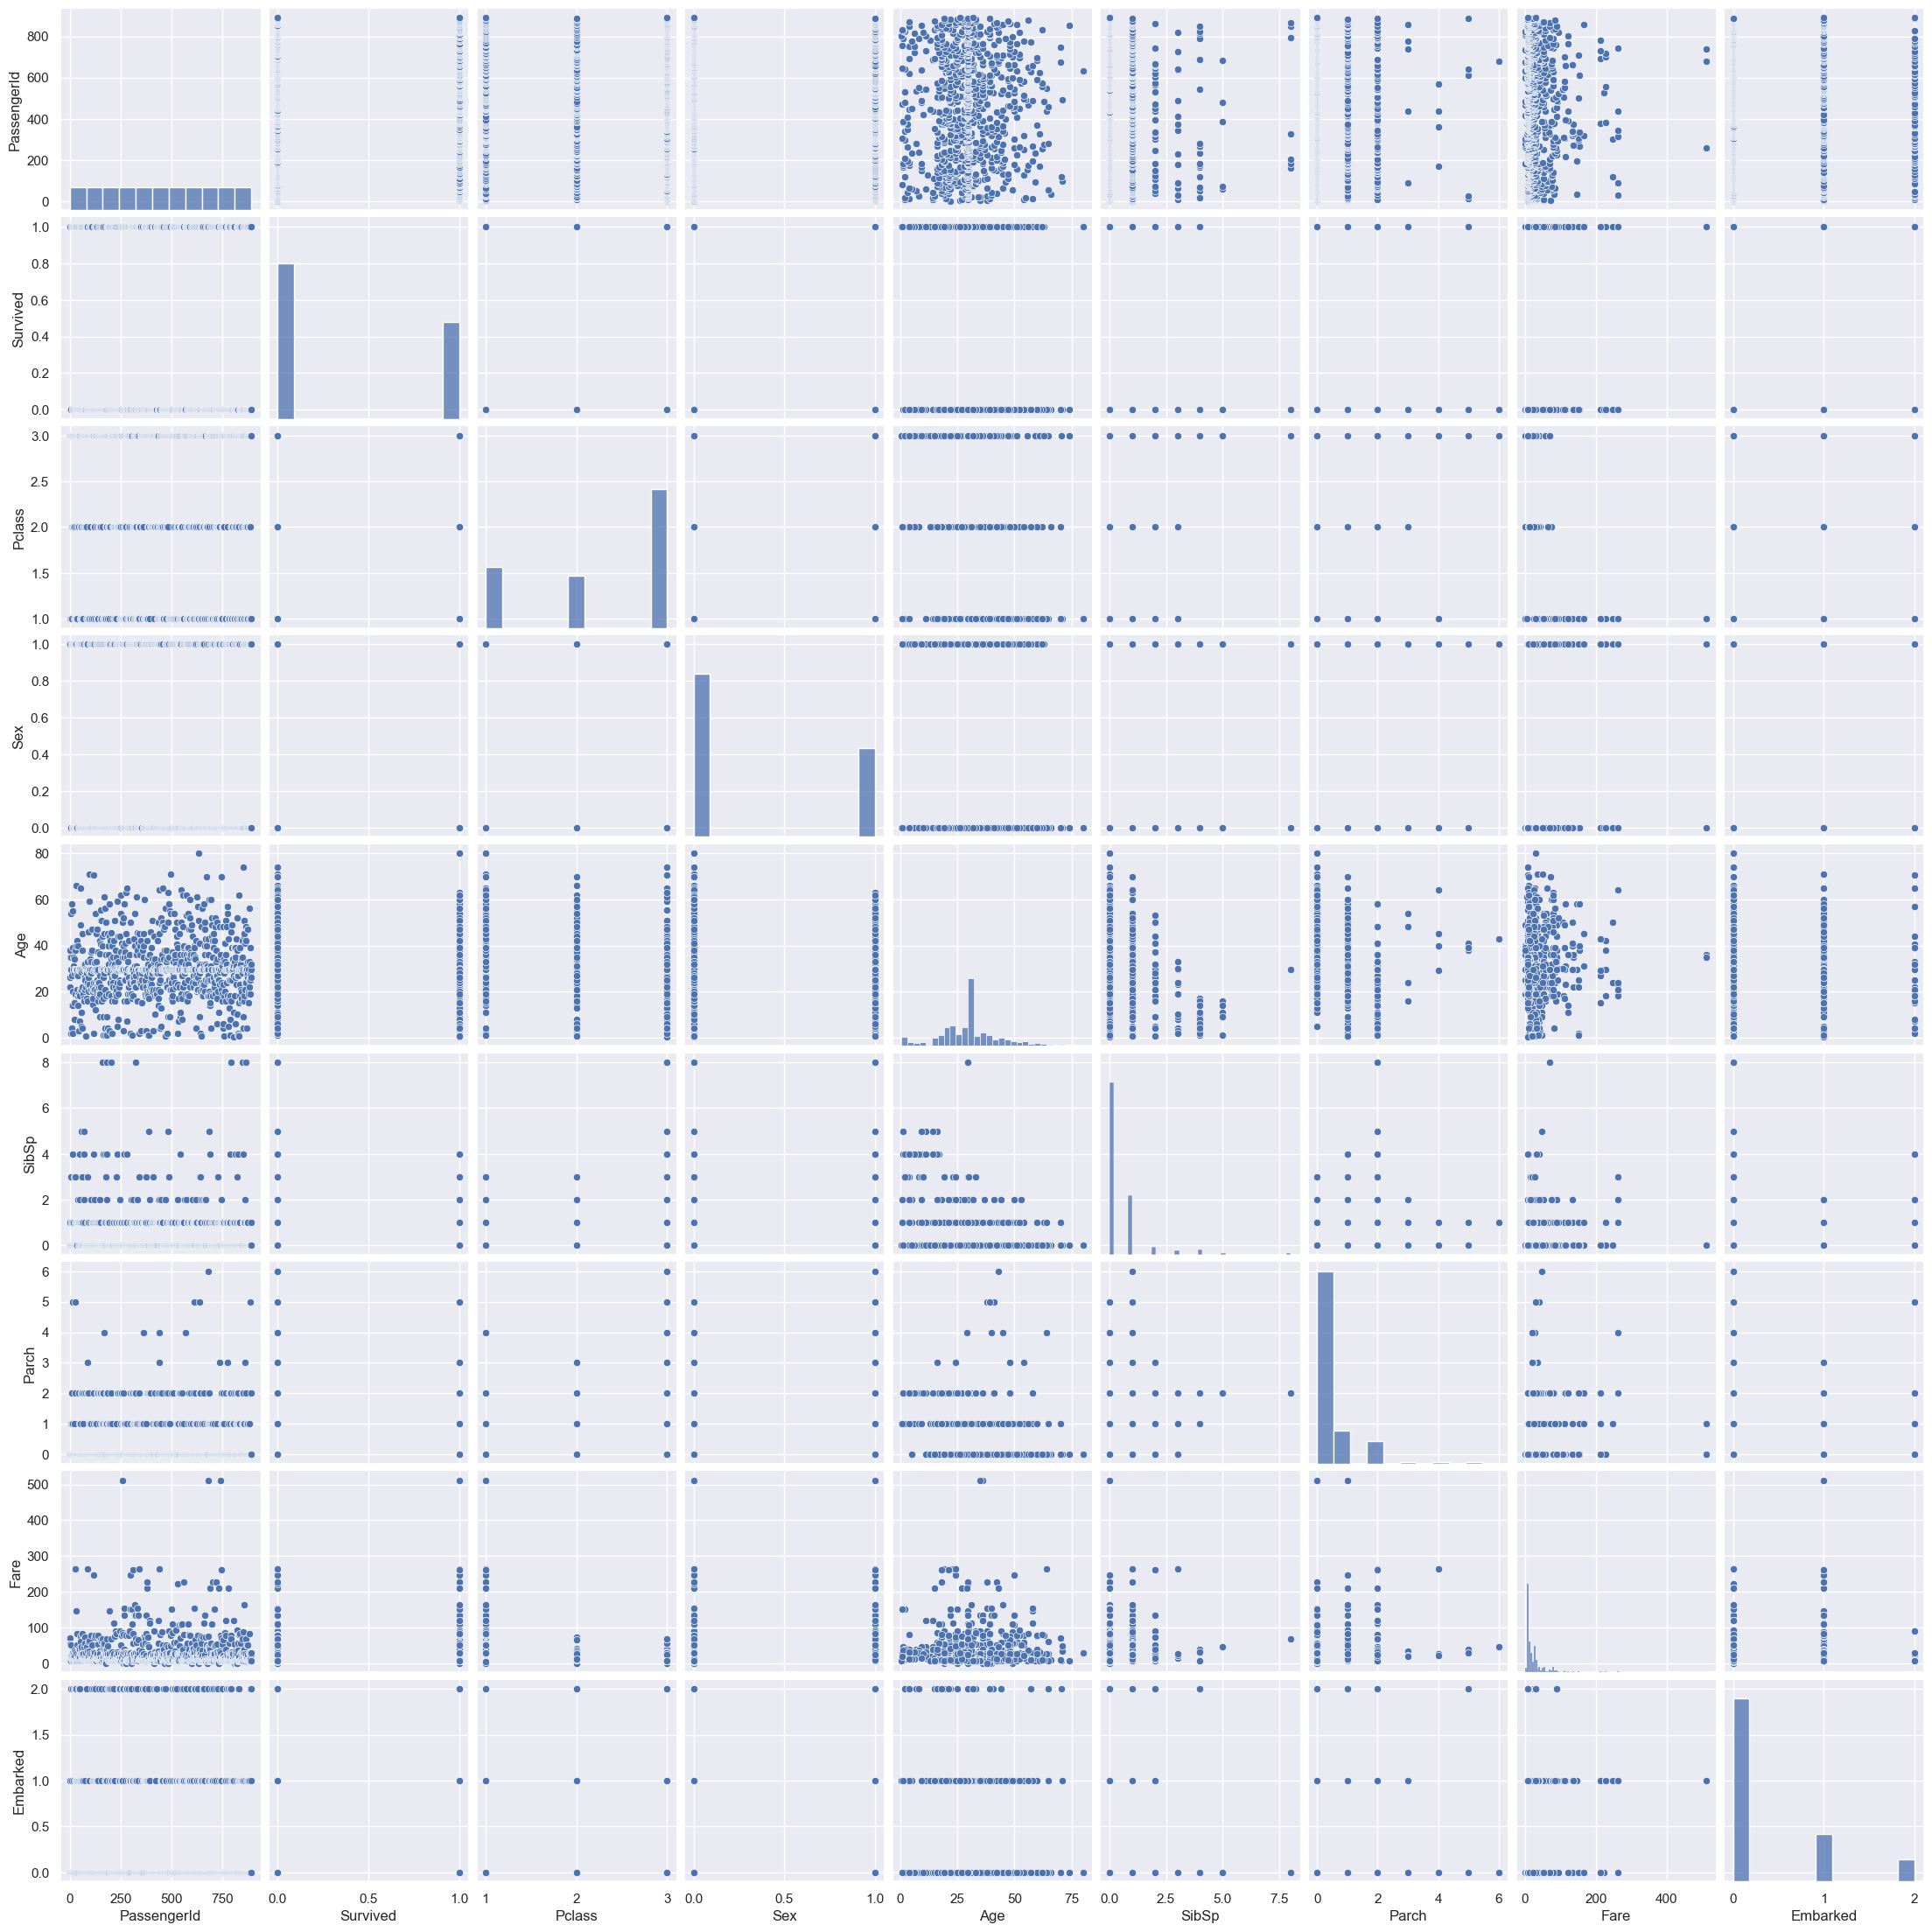

In [61]:
# Additional visualizations
plt.figure(figsize=(10, 6))
sns.pairplot(titanic_data)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17328\3475397076.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data['Age'])


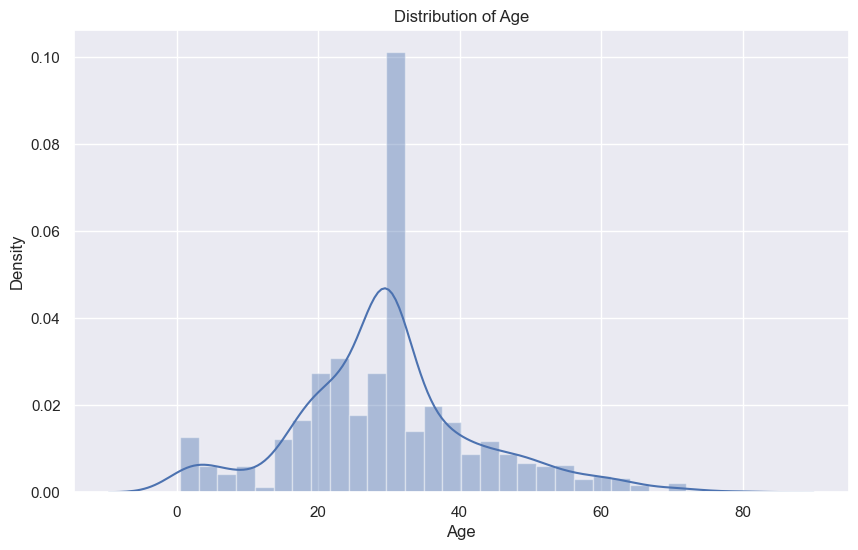

In [62]:
plt.figure(figsize=(10, 6))
sns.distplot(titanic_data['Age'])
plt.title('Distribution of Age')
plt.show()

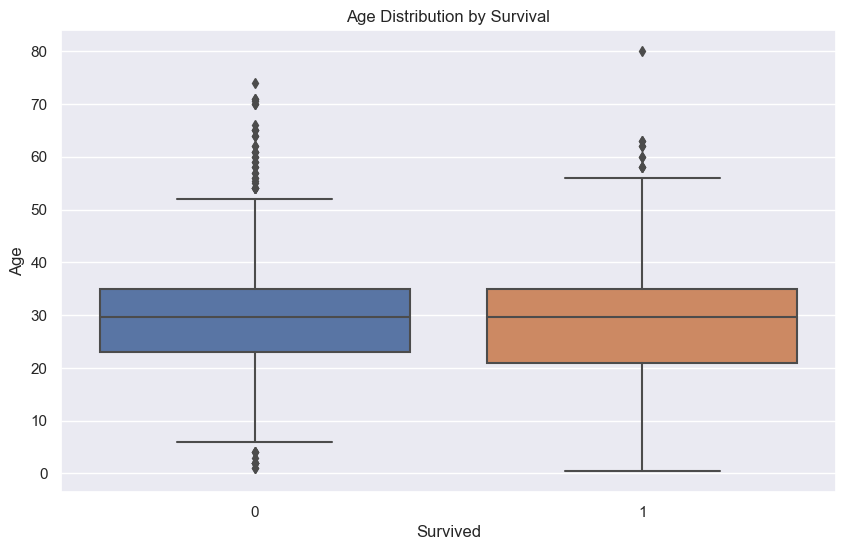

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_data)
plt.title('Age Distribution by Survival')
plt.show()

In [64]:
# 3. Data Cleaning:
# Handle outliers
outliers = titanic_data[(titanic_data['Age'] > 70) | (titanic_data['Fare'] > 100)]
titanic_data = titanic_data.drop(outliers.index)

In [65]:
# 4. Data Transformation:
# Scale numerical features
numeric_cols = ['Age', 'Fare']
scaler = StandardScaler()
titanic_data[numeric_cols] = scaler.fit_transform(titanic_data[numeric_cols])

In [66]:
# 5. Classification:
# Split data into train and test sets
X_processed  = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y_processed  = titanic_data['Survived']
X_train_processed, X_test_processed, Y_train_processed, Y_test_processed  = train_test_split(X_processed, Y_processed , test_size=0.2, random_state=2)

In [67]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine (SVM)': SVC(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

In [68]:
# Define a function to evaluate the model
def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    # Evaluate on training set
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, train_predictions)
    train_confusion_matrix = confusion_matrix(Y_train, train_predictions)
    train_classification_report = classification_report(Y_train, train_predictions)

    # Evaluate on test set
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, test_predictions)
    test_confusion_matrix = confusion_matrix(Y_test, test_predictions)
    test_classification_report = classification_report(Y_test, test_predictions)

    # Display evaluation results
    print("Training Set:")
    print("Accuracy:", train_accuracy)
    print("Confusion Matrix:\n", train_confusion_matrix)
    print("Classification Report:\n", train_classification_report)

    print("\nTest Set:")
    print("Accuracy:", test_accuracy)
    print("Confusion Matrix:\n", test_confusion_matrix)
    print("Classification Report:\n", test_classification_report)


In [69]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_processed, Y_train_processed)
    print(f"Evaluation on {name}:")
    evaluate_model(model, X_train_processed, Y_train_processed, X_test_processed, Y_test_processed)
    print("\n\n")


Evaluation on Logistic Regression:
Training Set:
Accuracy: 0.8063063063063063
Confusion Matrix:
 [[369  60]
 [ 69 168]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       429
           1       0.74      0.71      0.72       237

    accuracy                           0.81       666
   macro avg       0.79      0.78      0.79       666
weighted avg       0.80      0.81      0.81       666


Test Set:
Accuracy: 0.7604790419161677
Confusion Matrix:
 [[85 17]
 [23 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       102
           1       0.71      0.65      0.68        65

    accuracy                           0.76       167
   macro avg       0.75      0.74      0.74       167
weighted avg       0.76      0.76      0.76       167




Evaluation on Naive Bayes:
Training Set:
Accuracy: 0.7732732732732732
Confusion Matrix:
 [[337  9

In [70]:
# Train and evaluate models on unprocessed data
X_unprocessed = titanic_data_unprocessed.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y_unprocessed = titanic_data_unprocessed['Survived']
X_train_unprocessed, X_test_unprocessed, Y_train_unprocessed, Y_test_unprocessed = train_test_split(X_unprocessed, Y_unprocessed, test_size=0.2, random_state=2)

In [71]:
# Train and evaluate models on unprocessed data
for name, model in models.items():
    model.fit(X_train_unprocessed, Y_train_unprocessed)
    print(f"Evaluation on {name} (Unprocessed Data):")
    evaluate_model(model, X_train_unprocessed, Y_train_unprocessed, X_test_unprocessed, Y_test_unprocessed)
    print("\n\n")

Evaluation on Logistic Regression (Unprocessed Data):
Training Set:
Accuracy: 0.8089887640449438
Confusion Matrix:
 [[391  58]
 [ 78 185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       449
           1       0.76      0.70      0.73       263

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.81      0.81      0.81       712


Test Set:
Accuracy: 0.7821229050279329
Confusion Matrix:
 [[91  9]
 [30 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179




Evaluation on Naive Bayes (Unprocessed Data):
Training Set:
Accuracy: 0.793539